In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
#data = pd.read_csv(r'C:\Users\annal\Desktop\Vorlesungen\DM Project\full_data_for_classification_with_aggregated_values.csv')
data = pd.read_csv('merged.csv')
#data = pd.read_csv('test_this.csv')

In [3]:
data = data.drop(labels = ['Unnamed: 0'], axis = 1)

In [4]:
target = 'target+1'

In [5]:
# define target
y = data[target]
X = data.drop(labels=[target], axis = 1)

In [6]:
X

,og_min_u10n,og_max_u10n,og_mean_u10n,og_var_u10n,og_min_sp,og_max_sp,og_mean_sp,og_var_sp,og_min_u100,og_max_u100,...,root_min_cape,root_max_cape,root_mean_cape,root_var_cape,root_min_mcc,root_max_mcc,root_mean_mcc,root_var_mcc,root_var_hcc,root_var_lcc
0,0.103641,2.590697,1.514804,0.799987,99935.909173,100291.117074,100066.638959,1.283920e+04,0.976112,5.775857,...,1.913526,5.714396,3.061819,7.011840,7.450581e-09,0.842757,0.415268,0.257460,0.000000,0.076985
1,0.756276,1.753137,1.258293,0.104193,99936.895157,100352.022735,100170.593400,1.682136e+04,2.318027,4.260124,...,1.140033,9.204824,3.704122,20.006732,7.450581e-09,0.676333,0.277594,0.111327,0.000000,0.282959
2,-0.045470,1.204977,0.625798,0.156515,100177.926072,100406.956149,100300.192825,3.872460e+03,0.282899,4.680767,...,1.134539,6.137228,3.924721,9.120992,7.450581e-09,0.735000,0.279129,0.121378,0.392180,0.272631
3,-0.926448,-0.005474,-0.413083,0.063425,99716.485401,100149.078987,99901.154399,1.716791e+04,-1.404250,0.284615,...,0.193625,5.172601,2.628141,7.207168,5.017788e-02,0.912754,0.542959,0.292167,0.356829,0.239026
4,-2.120703,-0.189638,-1.096422,0.336395,98635.508513,99707.780568,99276.268043,1.198665e+05,-3.521195,0.668411,...,0.000000,4.306432,1.544286,5.122072,7.450581e-09,0.899316,0.377490,0.238551,0.420595,0.294026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3648,-1.487153,1.608968,0.301175,0.588146,96179.167985,99550.248442,97670.076078,1.180852e+06,-1.225053,3.461750,...,0.000000,7.423692,2.434897,12.958312,7.450581e-09,1.000001,0.730152,0.452131,0.001599,0.223002
3649,-1.937604,2.241073,0.070719,1.936037,95978.083522,96149.250403,96064.658816,2.374386e+03,-3.083617,4.628015,...,0.000000,7.100167,2.982477,14.002691,7.885589e-02,1.000001,0.752685,0.338613,0.269973,0.246787
3650,-1.275007,4.541304,1.831054,3.114473,96052.483083,97793.618742,97003.024807,3.886000e+05,-1.563192,7.613251,...,1.042702,10.856242,5.338310,35.595269,1.026670e-01,0.983125,0.691869,0.311054,0.279774,0.320712
3651,0.460792,3.112167,1.569105,0.548298,97816.071014,98730.726430,98303.762344,8.899821e+04,2.553866,5.371349,...,0.223579,9.419543,5.211113,29.110201,2.327882e-01,0.895899,0.548945,0.229972,0.298359,0.213280


In [7]:
# remove duplicate features (we have binary thunderstorm and categorical thunderstorm)
#X = X.drop(labels=['Totals_idx_cat', 'binary_severe_thunderstorm', 'binary_thunderstorm' ], axis = 1)


In [8]:
X

,og_min_u10n,og_max_u10n,og_mean_u10n,og_var_u10n,og_min_sp,og_max_sp,og_mean_sp,og_var_sp,og_min_u100,og_max_u100,...,root_min_cape,root_max_cape,root_mean_cape,root_var_cape,root_min_mcc,root_max_mcc,root_mean_mcc,root_var_mcc,root_var_hcc,root_var_lcc
0,0.103641,2.590697,1.514804,0.799987,99935.909173,100291.117074,100066.638959,1.283920e+04,0.976112,5.775857,...,1.913526,5.714396,3.061819,7.011840,7.450581e-09,0.842757,0.415268,0.257460,0.000000,0.076985
1,0.756276,1.753137,1.258293,0.104193,99936.895157,100352.022735,100170.593400,1.682136e+04,2.318027,4.260124,...,1.140033,9.204824,3.704122,20.006732,7.450581e-09,0.676333,0.277594,0.111327,0.000000,0.282959
2,-0.045470,1.204977,0.625798,0.156515,100177.926072,100406.956149,100300.192825,3.872460e+03,0.282899,4.680767,...,1.134539,6.137228,3.924721,9.120992,7.450581e-09,0.735000,0.279129,0.121378,0.392180,0.272631
3,-0.926448,-0.005474,-0.413083,0.063425,99716.485401,100149.078987,99901.154399,1.716791e+04,-1.404250,0.284615,...,0.193625,5.172601,2.628141,7.207168,5.017788e-02,0.912754,0.542959,0.292167,0.356829,0.239026
4,-2.120703,-0.189638,-1.096422,0.336395,98635.508513,99707.780568,99276.268043,1.198665e+05,-3.521195,0.668411,...,0.000000,4.306432,1.544286,5.122072,7.450581e-09,0.899316,0.377490,0.238551,0.420595,0.294026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3648,-1.487153,1.608968,0.301175,0.588146,96179.167985,99550.248442,97670.076078,1.180852e+06,-1.225053,3.461750,...,0.000000,7.423692,2.434897,12.958312,7.450581e-09,1.000001,0.730152,0.452131,0.001599,0.223002
3649,-1.937604,2.241073,0.070719,1.936037,95978.083522,96149.250403,96064.658816,2.374386e+03,-3.083617,4.628015,...,0.000000,7.100167,2.982477,14.002691,7.885589e-02,1.000001,0.752685,0.338613,0.269973,0.246787
3650,-1.275007,4.541304,1.831054,3.114473,96052.483083,97793.618742,97003.024807,3.886000e+05,-1.563192,7.613251,...,1.042702,10.856242,5.338310,35.595269,1.026670e-01,0.983125,0.691869,0.311054,0.279774,0.320712
3651,0.460792,3.112167,1.569105,0.548298,97816.071014,98730.726430,98303.762344,8.899821e+04,2.553866,5.371349,...,0.223579,9.419543,5.211113,29.110201,2.327882e-01,0.895899,0.548945,0.229972,0.298359,0.213280


In [9]:
# initial split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

# X_test and y_test will not be used from now on!

# Baseline: Initial ML application 

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [12]:

classifiers = [
    GaussianNB(),
    LogisticRegression(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    RandomForestClassifier(),
    MLPClassifier(),
]




In [13]:
sc = StandardScaler()


f1 = []
acc = []
prec = []
rec = []

scoring = ['accuracy', 'f1', 'precision', 'recall']
pipeline = Pipeline([ ('normalisation', sc), ('estimator', None) ])
for clf in classifiers:
    pipeline.set_params(estimator=clf)
    scores = cross_validate(pipeline, X_train, y_train, scoring=scoring)
    f1.append(np.mean(scores['test_f1']))
    acc.append(np.mean(scores['test_accuracy']))
    prec.append(np.mean(scores['test_precision']))
    rec.append(np.mean(scores['test_recall']))


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [14]:
str_classifiers = [str(clf)[:-2] for clf in classifiers]
result = pd.DataFrame({
    'Name' : str_classifiers,
    'Accuracy' : acc,
    'f1' : f1,
    'precision' : prec,
    'recall' : rec
})

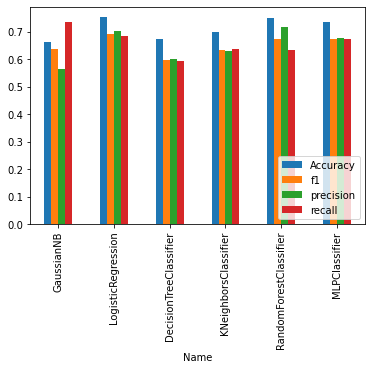

                     Name  Accuracy        f1  precision    recall
0              GaussianNB  0.661306  0.639252   0.565989  0.736134
1      LogisticRegression  0.753610  0.693761   0.702804  0.685200
2  DecisionTreeClassifier  0.672669  0.596592   0.599824  0.594102
3    KNeighborsClassifier  0.699277  0.633343   0.629210  0.638296
4  RandomForestClassifier  0.750104  0.673453   0.719150  0.635379
5           MLPClassifier  0.736416  0.674730   0.677687  0.672810


In [15]:
result.plot(x="Name", y=["Accuracy", "f1", "precision", "recall"], kind="bar")
plt.legend(loc=4)
plt.show()
print(result)

# Helper function

In [16]:
# scoring a pipeline

def score_a_pipeline(pipeline):
    scoring = ['accuracy', 'f1', 'precision', 'recall']
    f1 = []
    acc = []
    prec = []
    rec = []

    for clf in classifiers:
        pipeline.set_params(estimator=clf)
        scores = cross_validate(pipeline, X_train, y_train, scoring=scoring)
        f1.append(np.mean(scores['test_f1']))
        acc.append(np.mean(scores['test_accuracy']))
        prec.append(np.mean(scores['test_precision']))
        rec.append(np.mean(scores['test_recall']))
        
    str_classifiers = [str(clf)[:-2] for clf in classifiers]
    result = pd.DataFrame({
        'Name' : str_classifiers,
        'Accuracy' : acc,
        'f1' : f1,
        'precision' : prec,
        'recall' : rec
    })
    result.plot(x="Name", y=["Accuracy", "f1", "precision", "recall"], kind="bar")
    plt.legend(loc=4)
    plt.show()
    print(result)

# Balancing: Sampling Techniques 

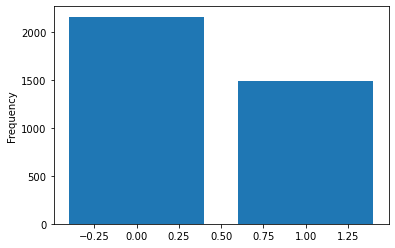

In [17]:
#inspect class distribution of target variable

class_dist = y.value_counts()
plt.bar(class_dist.index, class_dist)
plt.ylabel("Frequency")
plt.show()

### Undersampling 

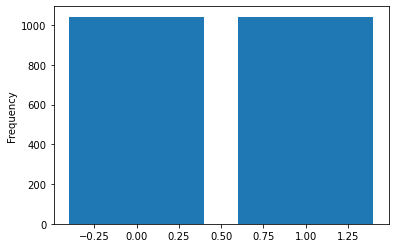

In [18]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

sampler = RandomUnderSampler()
balanced_data, balanced_target = sampler.fit_resample(X_train, y_train)

class_dist = pd.Series(balanced_target).value_counts()
plt.bar(class_dist.index, class_dist)
plt.ylabel("Frequency")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

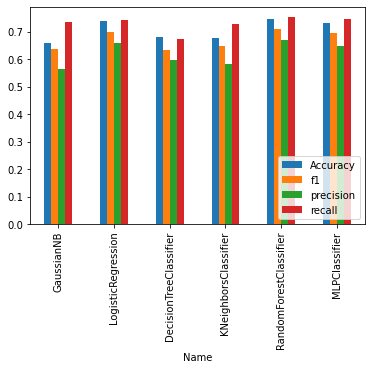

                     Name  Accuracy        f1  precision    recall
0              GaussianNB  0.659738  0.638223   0.565435  0.736161
1      LogisticRegression  0.739147  0.699259   0.659404  0.744718
2  DecisionTreeClassifier  0.681660  0.632963   0.597224  0.673716
3    KNeighborsClassifier  0.678934  0.649311   0.584763  0.730410
4  RandomForestClassifier  0.748149  0.709255   0.669789  0.754334
5           MLPClassifier  0.733283  0.694808   0.650768  0.746692


In [19]:
sampler = RandomUnderSampler()
sc = StandardScaler()

pipeline = Pipeline([ ('normalisation', sc), ('balancing', sampler), ('estimator', None) ])
score_a_pipeline(pipeline)


### Oversampling

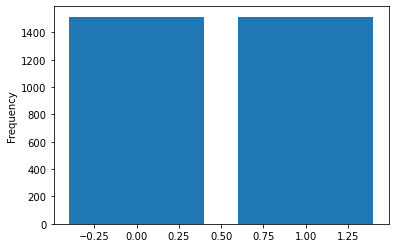

In [20]:
from imblearn.over_sampling import RandomOverSampler

sampler = RandomOverSampler()
balanced_data, balanced_target = sampler.fit_resample(X_train, y_train)

class_dist = pd.Series(balanced_target).value_counts()
plt.bar(class_dist.index, class_dist)
plt.ylabel("Frequency")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

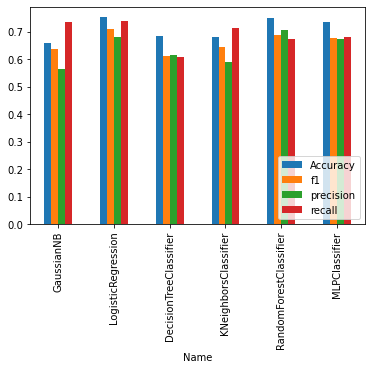

                     Name  Accuracy        f1  precision    recall
0              GaussianNB  0.659348  0.638263   0.563867  0.737081
1      LogisticRegression  0.754398  0.710998   0.682888  0.741848
2  DecisionTreeClassifier  0.684807  0.610891   0.614637  0.609523
3    KNeighborsClassifier  0.680499  0.645572   0.589017  0.715040
4  RandomForestClassifier  0.752448  0.688592   0.706581  0.672801
5           MLPClassifier  0.736803  0.678078   0.675393  0.682402


In [21]:
sampler = RandomOverSampler()
sc = StandardScaler()

pipeline = Pipeline([ ('normalisation', sc), ('balancing', sampler), ('estimator', None) ])
score_a_pipeline(pipeline)

### SMOTE

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

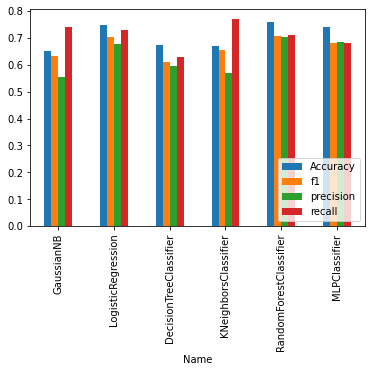

                     Name  Accuracy        f1  precision    recall
0              GaussianNB  0.651922  0.634064   0.555836  0.739984
1      LogisticRegression  0.748524  0.702805   0.677614  0.730309
2  DecisionTreeClassifier  0.674228  0.610905   0.594964  0.628648
3    KNeighborsClassifier  0.669158  0.654484   0.569464  0.769751
4  RandomForestClassifier  0.758704  0.705318   0.702694  0.709252
5           MLPClassifier  0.741105  0.681467   0.683210  0.680452


In [22]:
from imblearn.over_sampling import SMOTE
## only smote oversampling
sc = StandardScaler()

steps = [('normalisation', sc),('over', SMOTE()), ('estimator', None)]
pipeline_under_over = Pipeline(steps=steps)
score_a_pipeline(pipeline_under_over)


#for clf in classifiers:
#    pipeline_under_over.set_params(model=clf)
#    accuracy_scr = cross_val_score(pipeline_under_over, X_train, y_train, cv=10, scoring='accuracy')
#    print("Average Accuracy = {}%".format(accuracy_scr.mean() * 100.0))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

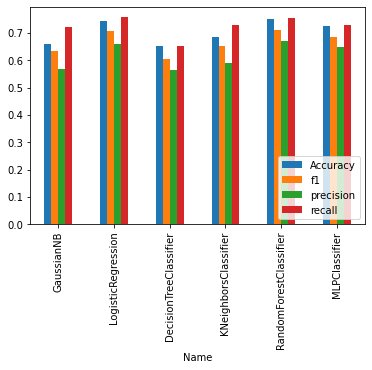

                     Name  Accuracy        f1  precision    recall
0              GaussianNB  0.660525  0.634342   0.566960  0.721738
1      LogisticRegression  0.743054  0.706032   0.660938  0.758143
2  DecisionTreeClassifier  0.653503  0.605223   0.565148  0.651615
3    KNeighborsClassifier  0.684019  0.652699   0.590781  0.729435
4  RandomForestClassifier  0.749323  0.710104   0.671715  0.754343
5           MLPClassifier  0.727029  0.685020   0.646839  0.729407


In [23]:
## under and oversampling 

sampler = RandomOverSampler()
sc = StandardScaler()

steps = [('normalisation', sc),('under', RandomUnderSampler()),('over', SMOTE()), ('estimator', None)]
pipeline_under_over = Pipeline(steps=steps)
score_a_pipeline(pipeline_under_over)


#for clf in classifiers:
#    pipeline_under_over.set_params(model=clf)
#    accuracy_scr = cross_val_score(pipeline_under_over, X_train, y_train, cv=10, scoring='accuracy')
#    print("Average Accuracy = {}%".format(accuracy_scr.mean() * 100.0))

# Feature Selection

In [24]:
from sklearn.feature_selection import SelectKBest, f_classif


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

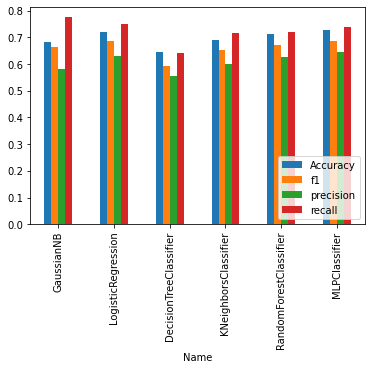

                     Name  Accuracy        f1  precision    recall
0              GaussianNB  0.682056  0.665187   0.582455  0.776454
1      LogisticRegression  0.719596  0.685184   0.631985  0.749545
2  DecisionTreeClassifier  0.643729  0.594695   0.554815  0.642114
3    KNeighborsClassifier  0.690271  0.653135   0.600534  0.715978
4  RandomForestClassifier  0.711389  0.670322   0.627075  0.720800
5           MLPClassifier  0.727422  0.688068   0.645331  0.738043


In [25]:
sampler = RandomUnderSampler()

steps = [
    ('normalisation', sc),
    ('balancing', sampler), 
    ('f_selection', SelectKBest(f_classif, k=30)),
    ('estimator', None)
]
pipeline = Pipeline(steps=steps)
score_a_pipeline(pipeline)


#for clf in classifiers:
#    pipeline.set_params(model=clf)
#    accuracy_scr = cross_val_score(pipeline, X_train, y_train, cv=10, scoring='accuracy')
#    print("Average Accuracy = {}%".format(accuracy_scr.mean() * 100.0))


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


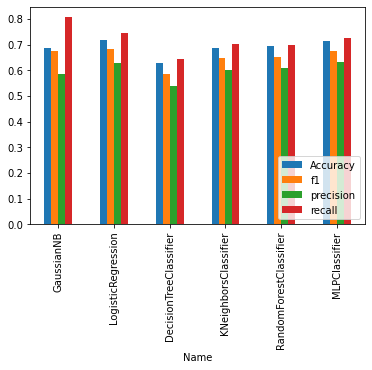

                     Name  Accuracy        f1  precision    recall
0              GaussianNB  0.685575  0.676652   0.583447  0.807145
1      LogisticRegression  0.716076  0.681375   0.628268  0.745721
2  DecisionTreeClassifier  0.628867  0.585614   0.537841  0.643039
3    KNeighborsClassifier  0.688308  0.646730   0.601107  0.700603
4  RandomForestClassifier  0.694576  0.650754   0.609709  0.698744
5           MLPClassifier  0.714912  0.674757   0.631824  0.726564


In [26]:
steps = [
    ('normalisation', sc),
    ('balancing', sampler), 
    ('f_selection', SelectKBest(f_classif, k=20)),
    ('estimator', None)
]
pipeline = Pipeline(steps=steps)
score_a_pipeline(pipeline)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

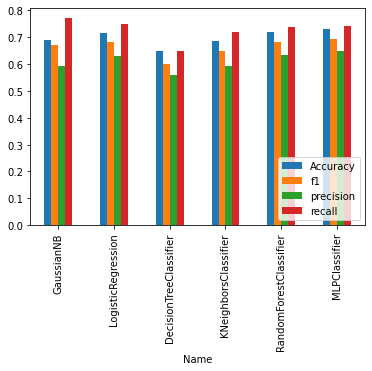

                     Name  Accuracy        f1  precision    recall
0              GaussianNB  0.689482  0.669001   0.591683  0.770662
1      LogisticRegression  0.716467  0.683176   0.627813  0.750501
2  DecisionTreeClassifier  0.648825  0.600309   0.559059  0.648864
3    KNeighborsClassifier  0.684804  0.649519   0.594080  0.717924
4  RandomForestClassifier  0.719607  0.681117   0.634484  0.738126
5           MLPClassifier  0.730940  0.692081   0.649072  0.742828


In [27]:
steps = [
    ('normalisation', sc),
    ('balancing', sampler), 
    ('f_selection', SelectKBest(f_classif, k=40)),
    ('estimator', None)
]
pipeline = Pipeline(steps=steps)
score_a_pipeline(pipeline)

# Hyperparameter tuning

Logistic regression delivers overall the best performance, Random Forest is a close second. We decide to do hyperparameter optimization for both with randomundersampling enabled using our full dataframe.

In [28]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

In [29]:
# define models and parameters for hyperparametrs
from sklearn.experimental import enable_halving_search_cv  
from sklearn.model_selection import HalvingGridSearchCV

# define grid search

from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_features': ['auto','sqrt'],
    'n_estimators': [100,1000],
     'criterion': ['gini','entropy'],
    'min_samples_split':[2,4]
}


# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = HalvingGridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2, random_state=1804, scoring= 'f1')

In [30]:
# use randomoversampler 
steps_3 = [('over', RandomOverSampler()), ('estimator', grid_search)]
pipeline_3 = Pipeline(steps=steps_3)
#fit the model
rf_hyperparameter = pipeline_3.fit(X_train, y_train)
print(rf_hyperparameter)

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 336
max_resources_: 3030
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 16
n_resources: 336
Fitting 5 folds for each of 16 candidates, totalling 80 fits
----------
iter: 1
n_candidates: 6
n_resources: 1008
Fitting 5 folds for each of 6 candidates, totalling 30 fits
----------
iter: 2
n_candidates: 2
n_resources: 3024
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Pipeline(steps=[('over', RandomOverSampler()),
                ('estimator',
                 HalvingGridSearchCV(estimator=RandomForestClassifier(),
                                     n_jobs=-1,
                                     param_grid={'bootstrap': [True],
                                                 'criterion': ['gini',
                                                               'entropy'],
                                                 'max_features': ['auto',
                         

In [31]:
# print('Best parameter set: %s' % grid_search.best_params_)
print("Best Score:" + str(grid_search.best_score_))
print("Best Parameters: " + str(grid_search.best_params_))
best_parameters = grid_search.best_params_

Best Score:0.8258760837971751
Best Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 4, 'n_estimators': 1000}


In [32]:
# final application of random forest

rf = RandomForestClassifier(bootstrap=True, criterion='entropy', max_features='sqrt', min_samples_split=4, n_estimators=1000)
steps_rf = [('over', RandomUnderSampler()), ('estimator', rf)]
pipeline_rf = Pipeline(steps=steps_rf)

pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('over', RandomUnderSampler()),
                ('estimator',
                 RandomForestClassifier(criterion='entropy',
                                        max_features='sqrt',
                                        min_samples_split=4,
                                        n_estimators=1000))])

In [33]:
pred_rf = pipeline_rf.predict(X_test)

[[486 163]
 [ 91 356]]


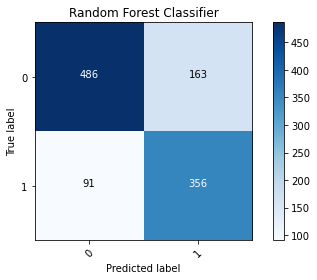

Random Forest with accuracy of 
              precision    recall  f1-score   support

           0       0.84      0.75      0.79       649
           1       0.69      0.80      0.74       447

    accuracy                           0.77      1096
   macro avg       0.76      0.77      0.76      1096
weighted avg       0.78      0.77      0.77      1096



In [34]:
#compute the confusion matrix
cnf_matrix = confusion_matrix(y_test, pred_rf)
print(cnf_matrix)

#compute accuracy score
acc = accuracy_score(y_test, pred_rf)

#plot the confusion matrix
plot_confusion_matrix(cnf_matrix, classes=['0','1'], title='Random Forest Classifier')



print("Random Forest with accuracy of ".format(acc))
print(classification_report(y_test, pred_rf, target_names=['0','1']))

In [35]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'penalty': ['l2'],
    'C': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],
    'solver' : ['newton-cg', 'lbfgs', 'liblinear']
}


# Create a based model
lr = LogisticRegression(max_iter=500, random_state=1804)
# Instantiate the grid search model
grid_search = HalvingGridSearchCV(estimator = lr, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2, random_state=1804, scoring= 'f1')

In [36]:
steps_lr = [('scaler', StandardScaler()),('sampling', RandomUnderSampler()), ('estimator', grid_search)]
pipeline_lr = Pipeline(steps=steps_lr)
#fit the model
lr_hyperparameter = pipeline_lr.fit(X_train, y_train)
print(lr_hyperparameter)

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 231
max_resources_: 2084
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 24
n_resources: 231
Fitting 5 folds for each of 24 candidates, totalling 120 fits
----------
iter: 1
n_candidates: 8
n_resources: 693
Fitting 5 folds for each of 8 candidates, totalling 40 fits
----------
iter: 2
n_candidates: 3
n_resources: 2079
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Pipeline(steps=[('scaler', StandardScaler()),
                ('sampling', RandomUnderSampler()),
                ('estimator',
                 HalvingGridSearchCV(estimator=LogisticRegression(max_iter=500,
                                                                  random_state=1804),
                                     n_jobs=-1,
                                     param_grid={'C': [1e-05, 0.0001, 0.001,
                                                       0.01, 0.1, 1, 10, 100],
               

In [37]:
# print('Best parameter set: %s' % grid_search.best_params_)
print("Best Score:" + str(grid_search.best_score_))
print("Best Parameters: " + str(grid_search.best_params_))
best_parameters = grid_search.best_params_

Best Score:0.7594240877428786
Best Parameters: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}


In [38]:
# final application

lr = LogisticRegression(C=0.01, penalty='l2', solver='liblinear')

steps_lr = [('scaler', StandardScaler()),('sampling', RandomUnderSampler()), ('estimator', lr)]
pipeline_lr = Pipeline(steps=steps_lr)

pipeline_lr.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('sampling', RandomUnderSampler()),
                ('estimator', LogisticRegression(C=0.01, solver='liblinear'))])

In [39]:
pred_lr = pipeline_lr.predict(X_test)

[[485 164]
 [ 95 352]]


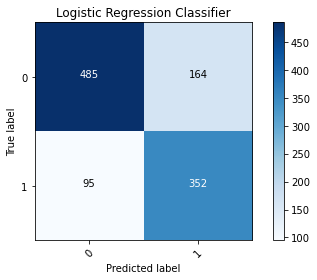

Logistic Regression with accuracy of 
              precision    recall  f1-score   support

           0       0.84      0.75      0.79       649
           1       0.68      0.79      0.73       447

    accuracy                           0.76      1096
   macro avg       0.76      0.77      0.76      1096
weighted avg       0.77      0.76      0.77      1096



In [40]:
#compute the confusion matrix
cnf_matrix = confusion_matrix(y_test, pred_lr)
print(cnf_matrix)

#compute accuracy score
acc = accuracy_score(y_test, pred_lr)

#plot the confusion matrix
plot_confusion_matrix(cnf_matrix, classes=['0','1'], title='Logistic Regression Classifier')



print("Logistic Regression with accuracy of ".format(acc))
print(classification_report(y_test, pred_lr, target_names=['0','1']))

In [41]:
# final application

mlp = MLPClassifier()

steps_mlp = [('scaler', StandardScaler()),('sampling', RandomUnderSampler()), ('estimator', mlp)]
pipeline_mlp = Pipeline(steps=steps_mlp)

pipeline_mlp.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('sampling', RandomUnderSampler()),
                ('estimator', MLPClassifier())])

In [42]:
pred_mlp = pipeline_mlp.predict(X_test)

[[464 185]
 [ 98 349]]


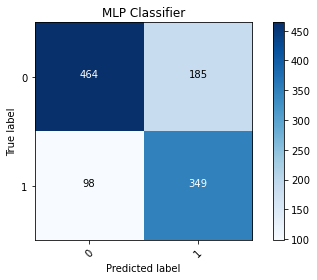

MLP with accuracy of 
              precision    recall  f1-score   support

           0       0.83      0.71      0.77       649
           1       0.65      0.78      0.71       447

    accuracy                           0.74      1096
   macro avg       0.74      0.75      0.74      1096
weighted avg       0.76      0.74      0.74      1096



In [43]:
#compute the confusion matrix
cnf_matrix = confusion_matrix(y_test, pred_mlp)
print(cnf_matrix)

#compute accuracy score
acc = accuracy_score(y_test, pred_mlp)

#plot the confusion matrix
plot_confusion_matrix(cnf_matrix, classes=['0','1'], title='MLP Classifier')



print("MLP with accuracy of ".format(acc))
print(classification_report(y_test, pred_mlp, target_names=['0','1']))

In [45]:
# Create the parameter grid based on the results of random search 
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}


# Create a based model
nb = GaussianNB()
# Instantiate the grid search model
grid_search = HalvingGridSearchCV(estimator = lr, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2, random_state=1804, scoring= 'f1')

In [46]:
steps_nb = [('scaler', StandardScaler()),('sampling', RandomUnderSampler()), ('estimator', grid_search)]
pipeline_nb = Pipeline(steps=steps_nb)
#fit the model
nb_hyperparameter = pipeline_nb.fit(X_train, y_train)
print(nb_hyperparameter)

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 231
max_resources_: 2084
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 24
n_resources: 231
Fitting 5 folds for each of 24 candidates, totalling 120 fits
----------
iter: 1
n_candidates: 8
n_resources: 693
Fitting 5 folds for each of 8 candidates, totalling 40 fits
----------
iter: 2
n_candidates: 3
n_resources: 2079
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Pipeline(steps=[('scaler', StandardScaler()),
                ('sampling', RandomUnderSampler()),
                ('estimator',
                 HalvingGridSearchCV(estimator=LogisticRegression(C=0.01,
                                                                  solver='liblinear'),
                                     n_jobs=-1,
                                     param_grid={'C': [1e-05, 0.0001, 0.001,
                                                       0.01, 0.1, 1, 10, 100],
                    

In [47]:
# print('Best parameter set: %s' % grid_search.best_params_)
print("Best Score:" + str(grid_search.best_score_))
print("Best Parameters: " + str(grid_search.best_params_))
best_parameters = grid_search.best_params_

Best Score:0.7561605805589237
Best Parameters: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}


In [48]:
# final application

nb = GaussianNB()

steps_nb = [('scaler', StandardScaler()),('sampling', RandomUnderSampler()), ('estimator', nb)]
pipeline_nb = Pipeline(steps=steps_nb)

pipeline_nb.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('sampling', RandomUnderSampler()),
                ('estimator', GaussianNB())])

In [49]:
pred_nb = pipeline_nb.predict(X_test)

[[401 248]
 [105 342]]


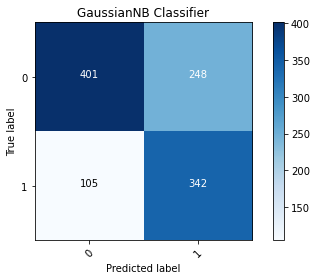

GaussianNB with accuracy of 
              precision    recall  f1-score   support

           0       0.79      0.62      0.69       649
           1       0.58      0.77      0.66       447

    accuracy                           0.68      1096
   macro avg       0.69      0.69      0.68      1096
weighted avg       0.71      0.68      0.68      1096



In [50]:
#compute the confusion matrix
cnf_matrix = confusion_matrix(y_test, pred_nb)
print(cnf_matrix)

#compute accuracy score
acc = accuracy_score(y_test, pred_nb)

#plot the confusion matrix
plot_confusion_matrix(cnf_matrix, classes=['0','1'], title='GaussianNB Classifier')



print("GaussianNB with accuracy of ".format(acc))
print(classification_report(y_test, pred_nb, target_names=['0','1']))

In [51]:
# final application

knn = KNeighborsClassifier(metric='manhattan', n_neighbors=10, weights='distance')

steps_knn = [('scaler', StandardScaler()),('sampling', RandomUnderSampler()), ('estimator', knn)]
pipeline_knn = Pipeline(steps=steps_knn)

pipeline_knn.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('sampling', RandomUnderSampler()),
                ('estimator',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=10,
                                      weights='distance'))])

In [52]:
pred_knn = pipeline_knn.predict(X_test)

[[426 223]
 [ 89 358]]


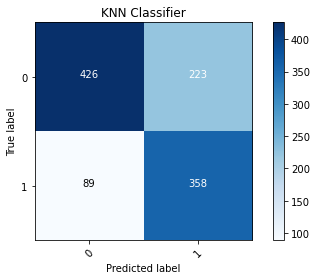

KNN with accuracy of 
              precision    recall  f1-score   support

           0       0.83      0.66      0.73       649
           1       0.62      0.80      0.70       447

    accuracy                           0.72      1096
   macro avg       0.72      0.73      0.71      1096
weighted avg       0.74      0.72      0.72      1096



In [53]:
#compute the confusion matrix
cnf_matrix = confusion_matrix(y_test, pred_knn)
print(cnf_matrix)

#compute accuracy score
acc = accuracy_score(y_test, pred_knn)

#plot the confusion matrix
plot_confusion_matrix(cnf_matrix, classes=['0','1'], title='KNN Classifier')



print("KNN with accuracy of ".format(acc))
print(classification_report(y_test, pred_knn, target_names=['0','1']))

# Ensemble

In [54]:
from scipy.stats import mode

In [55]:
e_mlp = pred_mlp
e_nb = pred_nb
e_lr = pred_lr
e_rf = pred_rf
e_knn = pred_knn


res = []
for i in np.arange(len(pred_mlp)):
    r = mode([e_mlp[i], e_nb[i], e_lr[i], e_rf[i], e_knn[i]])[0][0]
    res.append(r)
    


[[473 176]
 [ 81 366]]


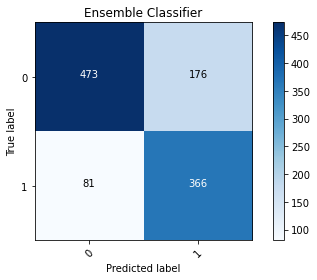

Ensemble with accuracy of 
              precision    recall  f1-score   support

           0       0.85      0.73      0.79       649
           1       0.68      0.82      0.74       447

    accuracy                           0.77      1096
   macro avg       0.76      0.77      0.76      1096
weighted avg       0.78      0.77      0.77      1096



In [56]:
#compute the confusion matrix
cnf_matrix = confusion_matrix(y_test, res)
print(cnf_matrix)

#compute accuracy score
acc = accuracy_score(y_test, res)

#plot the confusion matrix
plot_confusion_matrix(cnf_matrix, classes=['0','1'], title='Ensemble Classifier')



print("Ensemble with accuracy of ".format(acc))
print(classification_report(y_test, res, target_names=['0','1']))

# Feature Importance

In [57]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [58]:
rf.feature_importances_

array([2.57359467e-03, 1.86851851e-03, 2.53494107e-03, 1.56081109e-03,
       5.27333144e-03, 7.27241114e-03, 5.83511798e-03, 1.62584182e-03,
       1.81474021e-03, 1.74959805e-03, 2.90270787e-03, 1.44352128e-03,
       1.24283019e-03, 1.28374875e-03, 6.91632544e-04, 1.90717265e-03,
       6.49431656e-04, 9.27997001e-04, 8.65972075e-04, 1.81549238e-03,
       1.00403256e-02, 8.49287270e-03, 1.92091321e-02, 3.16462590e-03,
       5.15058757e-05, 3.49935569e-04, 8.48138431e-04, 7.67752289e-04,
       1.60452917e-03, 1.69415627e-03, 1.95592400e-03, 2.62589518e-03,
       8.03175657e-03, 3.05077375e-03, 1.03325717e-02, 1.46619732e-03,
       5.02772034e-03, 3.10707933e-03, 4.02253329e-03, 2.96371691e-03,
       1.24920275e-03, 7.04285225e-04, 9.30313259e-04, 1.53299557e-03,
       9.21023575e-04, 9.78779808e-04, 1.64096942e-03, 1.87679637e-03,
       8.40958616e-04, 1.10934853e-03, 1.71132302e-03, 1.01865928e-03,
       1.44168667e-03, 1.42019470e-03, 1.88994313e-03, 1.35863344e-03,
      

In [59]:
#plot graph of feature importances

sorted_idx = rf.feature_importances_.argsort()


In [60]:
sorted_idx

array([296, 298, 299, 288, 291, 139, 468,  24, 184, 297, 136, 433, 290,
       564, 337, 185, 300, 437, 128, 131, 469, 376, 572, 140, 568, 338,
       567,  25, 540, 178, 304, 289, 517,  86, 496, 232, 463, 144, 240,
        61, 542,  85, 246, 273, 439, 349, 457, 425,  78,  90, 570,  76,
        92, 516, 250, 365, 124, 515, 503, 556,  81, 274, 249, 208, 292,
        72, 525, 410, 479, 569,  16, 174, 507, 388, 330, 480, 405, 132,
       254, 112,  77, 381, 429,  14, 309,  88, 138, 242, 509, 521, 559,
       272,  41,  94, 313, 238, 301, 403, 331, 137, 441, 378, 434, 220,
       436, 177, 270, 446, 221,  27, 554, 148, 186, 113, 382, 524, 110,
       372, 352, 565, 445, 295, 484, 114, 394, 470, 141, 176, 392, 459,
       504, 236, 355, 478, 302, 339,  80,  48, 566, 222,  26, 440, 332,
       143, 285, 423,  82,  73, 248, 536, 211,  18, 508, 495, 266,  74,
       461, 200, 126, 512, 284, 393,  84, 471, 380, 386, 513, 348, 252,
       385, 308, 435, 204, 458, 409,  44, 347, 505,  17, 407,  4

In [61]:
new = [
       251, 194, 199,  75, 183, 145, 467, 375, 323,  37, 387, 196, 397,
       477, 530, 262, 399,  33,  38, 452, 193, 261, 102,  32,  36, 100,
       164]

Text(0.5, 0, 'Random Forest Feature Importance')

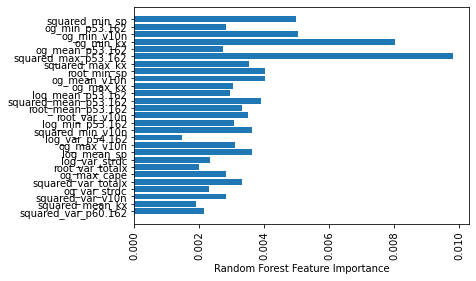

In [62]:
#plt.figure(figsize=(200,200), dpi=80)
plt.barh(data.columns[new], rf.feature_importances_[new])
plt.xticks(rotation=90)
plt.xlabel("Random Forest Feature Importance")

In [63]:
X_train.head()

,og_min_u10n,og_max_u10n,og_mean_u10n,og_var_u10n,og_min_sp,og_max_sp,og_mean_sp,og_var_sp,og_min_u100,og_max_u100,...,root_min_cape,root_max_cape,root_mean_cape,root_var_cape,root_min_mcc,root_max_mcc,root_mean_mcc,root_var_mcc,root_var_hcc,root_var_lcc
3167,-0.272748,2.510096,0.874823,1.015738,100152.036940,100507.301183,100333.089488,14818.723200,-2.004089,2.832616,...,0.000000,0.000000,0.000000,0.000000,7.450581e-09,0.155642,0.073069,0.008294,0.061901,0.000645
2919,0.483832,5.200783,2.233676,1.985802,100828.591223,101358.262010,101179.977261,27576.130235,1.917981,9.318708,...,0.223579,8.898324,2.526725,15.800202,7.450581e-09,0.812385,0.409875,0.212219,0.416814,0.186901
1838,1.753441,7.510138,5.326293,2.377492,98371.912643,99744.092963,99162.607525,258927.039519,5.149584,12.637049,...,0.651839,8.276192,3.621456,15.768006,1.986770e-01,0.920572,0.620143,0.208872,0.273264,0.223234
2747,0.953671,2.937279,2.031259,0.465723,99505.625607,99789.983491,99626.708006,7251.153258,1.499513,4.857103,...,0.499937,6.809985,3.942129,14.086402,3.622172e-01,0.988666,0.784629,0.217836,0.243765,0.288163
2737,-4.248023,-0.605339,-2.713991,1.378436,99236.620909,99504.724136,99362.136715,5665.743321,-7.993214,-3.103070,...,0.000000,0.000000,0.000000,0.000000,7.450581e-09,0.512974,0.179413,0.061811,0.000000,0.021502


In [65]:
# logistic regression weights

lr = LogisticRegression(C=0.01, penalty='l2', solver='liblinear')

steps_lr = [('scaler', StandardScaler()),('sampling', RandomUnderSampler()), ('estimator', lr)]
pipeline_lr = Pipeline(steps=steps_lr)

pipeline_lr.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('sampling', RandomUnderSampler()),
                ('estimator', LogisticRegression(C=0.01, solver='liblinear'))])

In [97]:
weights = pipeline_lr['estimator'].coef_

In [107]:
weights

array([[-1.03110397e-01, -1.01918592e-01, -8.94943054e-02,
        -8.28844570e-02, -8.08291812e-02, -7.99053385e-02,
        -7.54388036e-02, -7.39183163e-02, -7.30792805e-02,
        -7.26725499e-02, -6.97744553e-02, -6.94019117e-02,
        -6.82232870e-02, -6.76309436e-02, -6.67899274e-02,
        -6.67183718e-02, -6.50749552e-02, -5.86738030e-02,
        -5.73489642e-02, -5.71605374e-02, -5.52995670e-02,
        -5.42289244e-02, -5.18928985e-02, -5.13520411e-02,
        -5.12044141e-02, -5.11740548e-02, -5.07395886e-02,
        -5.06329285e-02, -4.97136919e-02, -4.91500542e-02,
        -4.90564863e-02, -4.87951769e-02, -4.86557925e-02,
        -4.83741367e-02, -4.83230709e-02, -4.69334485e-02,
        -4.67060764e-02, -4.66713805e-02, -4.63158658e-02,
        -4.57483545e-02, -4.55784024e-02, -4.53674361e-02,
        -4.52696040e-02, -4.52288567e-02, -4.45159187e-02,
        -4.43443266e-02, -4.40905523e-02, -4.39266325e-02,
        -4.35679339e-02, -4.32510207e-02, -4.30953879e-0

# Experiments with the MLPClassifier

In [149]:
from sklearn.neural_network import MLPClassifier

param_grid = {
    'hidden_layer_sizes': [
        [300, 200, 100, 50, 10],
        [20, 20], 
        [50, 50],
        [100, 100],
        [200, 200],
        [50, 50, 50],
        [100, 100, 100],
        [1000],
        [500, 500]
    ],
    'activation': ['logistic', 'tanh', 'relu'],
    'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1, 2, 5],
    'learning_rate_init': [1e-4, 1e-3, 1e-2, 5e-2]
}

# Create a based model
mlp = MLPClassifier()
# Instantiate the grid search model
grid_search = HalvingGridSearchCV(estimator = mlp, param_grid = param_grid,
                          cv = 5, n_jobs = -1, verbose = 2, random_state=1804)

In [150]:
# use randomoversampler 
steps_mlp = [('over', RandomOverSampler()),('f_selection', SelectKBest(f_classif, k=100)), ('estimator', grid_search)]
pipeline_mlp = Pipeline(steps=steps_mlp)
#fit the model
mlp_hyperparameter = pipeline_mlp.fit(X_train, y_train)
print(mlp_hyperparameter)

n_iterations: 5
n_required_iterations: 7
n_possible_iterations: 5
min_resources_: 20
max_resources_: 3030
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 756
n_resources: 20
Fitting 5 folds for each of 756 candidates, totalling 3780 fits
----------
iter: 1
n_candidates: 252
n_resources: 60
Fitting 5 folds for each of 252 candidates, totalling 1260 fits
----------
iter: 2
n_candidates: 84
n_resources: 180
Fitting 5 folds for each of 84 candidates, totalling 420 fits
----------
iter: 3
n_candidates: 28
n_resources: 540
Fitting 5 folds for each of 28 candidates, totalling 140 fits
----------
iter: 4
n_candidates: 10
n_resources: 1620
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Pipeline(steps=[('over', RandomOverSampler()),
                ('f_selection', SelectKBest(k=100)),
                ('estimator',
                 HalvingGridSearchCV(estimator=MLPClassifier(), n_jobs=-1,
                                     param_grid={'activation': ['logis

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [151]:
# print('Best parameter set: %s' % grid_search.best_params_)
print("Best Score:" + str(grid_search.best_score_))
print("Best Parameters: " + str(grid_search.best_params_))
best_parameters = grid_search.best_params_

Best Score:0.5746913580246915
Best Parameters: {'activation': 'tanh', 'alpha': 2, 'hidden_layer_sizes': [300, 200, 100, 50, 10], 'learning_rate_init': 0.0001}


In [77]:
grid_search.scoring